# Mitsubishi reverse cycle heat pump

In [2]:
from Modules.Heating import Heat_Pump
import matplotlib.pyplot as plt
import Modules.Data as Data
import numpy as np

Heat_Pump = Heat_Pump("Data/Heat_Pump/EAHV-M1500-YCL(-N)/Heating_5C.csv")

COP_interp = Heat_Pump.interp_init("COP")

air_temp = np.linspace(-20, 25, 1000)
hydronics_temp = [25, 30, 35, 40, 45, 47.5, 50, 52.5, 55]

for flow_temp in hydronics_temp:

    COP = Heat_Pump.Calculate_COP(flow_temp, air_temp, COP_interp)
    
    plt.plot(air_temp, COP, label = 'Flow temp ' + str(output_temp) + '°C')
    
# data points
data_air_temp = Data.column_from_csv("Data/Heat_Pump/EAHV-M1500-YCL(-N)/Heating_5C.csv", "Air temperature(°C)")

data_flow_temp = Data.column_from_csv("Data/Heat_Pump/EAHV-M1500-YCL(-N)/Heating_5C.csv", "Flow temperature(°C)") 

data_COP = Heat_Pump.Calculate_COP(data_flow_temp, data_air_temp, COP_interp)

plt.plot(data_air_temp, data_COP, label="data points", marker='x', color='red', linestyle='None')

plt.title('Coefficient of performance for a heat pump')
plt.xlabel('Air temperature(°C)')
plt.ylabel('COP')
plt.legend()

NameError: name 'output_temp' is not defined

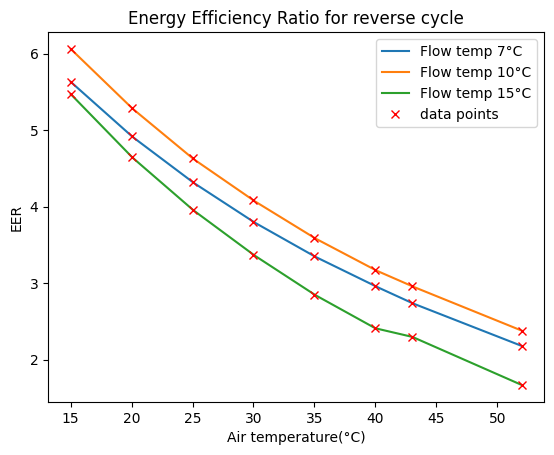

In [ ]:
from Modules.Heating import HVAC
import matplotlib.pyplot as plt
import Modules.Data as Data
import numpy as np

HVAC = HVAC("Data/Heat_Pump/EAHV-M1500-YCL(-N)/Cooling_5C.csv")

EER_interp = HVAC.interp_init("EER")

air_temp = np.linspace(15, 52, 1000)
hydronics_temp = [7, 10, 15]

for flow_temp in hydronics_temp:

    EER = HVAC.Calculate_EER(flow_temp, air_temp, EER_interp)
    
    plt.plot(air_temp, EER, label = 'Flow temp ' + str(flow_temp) + '°C')
    
# data points
data_air_temp = Data.column_from_csv("Data/Heat_Pump/EAHV-M1500-YCL(-N)/Cooling_5C.csv", "Air temperature(°C)")

data_flow_temp = Data.column_from_csv("Data/Heat_Pump/EAHV-M1500-YCL(-N)/Cooling_5C.csv", "Flow temperature(°C)") 

data_EER = HVAC.Calculate_EER(data_flow_temp, data_air_temp, EER_interp)

plt.plot(data_air_temp, data_EER, label="data points", marker='x', color='red', linestyle='None')

plt.title('Energy Efficiency Ratio for reverse cycle')
plt.xlabel('Air temperature(°C)')
plt.ylabel('EER')
plt.legend()

Number of fan coils required: 90
Total heating electricity usage 102322.07058446475 kWh/yr
Effective COP: 3.3387874976395264
Total cooling electricity usage 57738.122593794236 kWh/yr
Effective EER: 4.301509450650101


Text(0, 0.5, 'Capped cooling requirement (kW)')

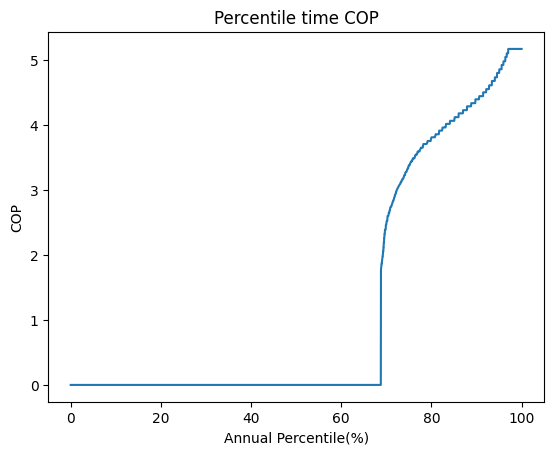

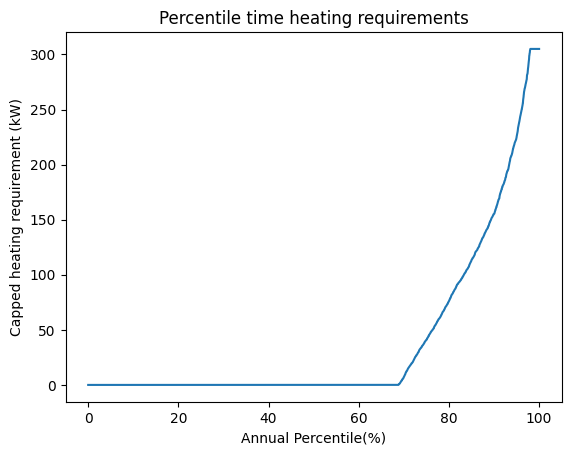

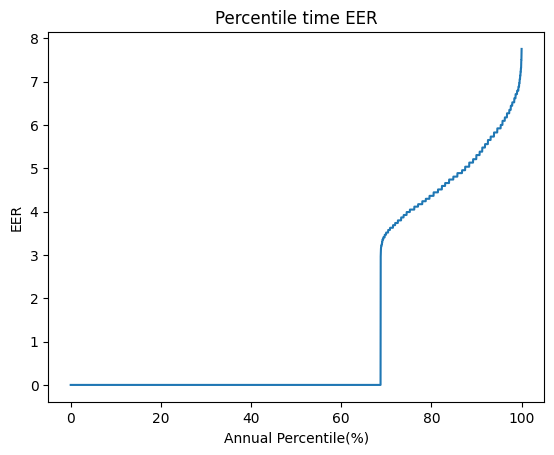

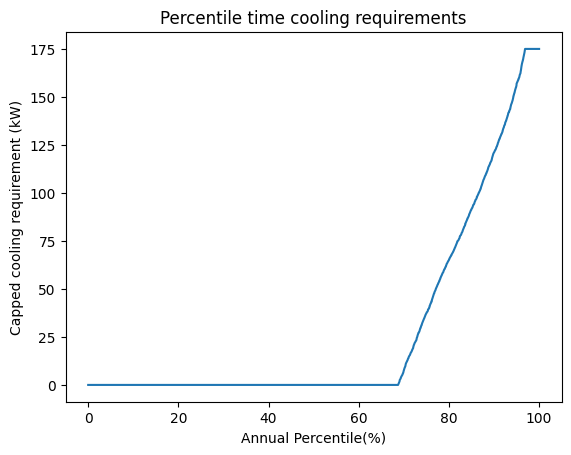

In [ ]:
from Modules.Heating import Heat_Pump
from Modules.Heating import HVAC
from Modules.Heating import Reverse_HP_Controller
from Modules.Heating import Heating_Distribution
import numpy as np
import matplotlib.pyplot as plt

max_HP_power = 305 # in kW
max_HVAC_power = 175 # in kW
# max_hydronics_temp = 55 # based off of operating conditions of heat pump

Heat_Pump = Heat_Pump("Data/Heat_Pump/EAHV-M1500-YCL(-N)/Heating_5C.csv")
HVAC = HVAC("Data/Heat_Pump/EAHV-M1500-YCL(-N)/Cooling_5C.csv")

Heating_Distribution = Heating_Distribution("Data/HFP-550LM-Z1", max_HP_power, max_HVAC_power)

Controller = Reverse_HP_Controller(Heat_Pump, HVAC, Heating_Distribution, max_HP_power, max_HVAC_power)

(
    time, air_temp,
    heating, heating_electricity, heating_hydronics_temp, COP,
    cooling, cooling_electricity, cooling_hydronics_temp, EER
) = Controller.controller()

indices = [i for i, x in enumerate(heating_electricity) if np.isnan(x)]

# HP system
print('Total heating electricity usage ' + str(np.sum(heating_electricity)) + ' kWh/yr')

effective_COP = np.sum(heating) / np.sum(heating_electricity)
print('Effective COP: ' + str(effective_COP))

# HVAC system
print('Total cooling electricity usage ' + str(np.sum(cooling_electricity)) + ' kWh/yr')

effective_EER = np.sum(cooling) / np.sum(cooling_electricity)
print('Effective EER: ' + str(effective_EER))

# Plotting stuff - maybe don't need now?

# When heating is zero set COP to 0
indices = [i for i, x in enumerate(heating) if x == 0]
COP[indices] = 0

# When cooling is zero set EER to 0
indices = [i for i, x in enumerate(cooling) if x == 0]
EER[indices] = 0

plt.figure(0)
plt.plot(100 * time / np.max(time), np.sort(COP))
plt.title("Percentile time COP")
plt.xlabel('Annual Percentile(%)')
plt.ylabel('COP')

plt.figure(1)
plt.plot(100 * time / np.max(time), np.sort(heating))
plt.title('Percentile time heating requirements')
plt.xlabel('Annual Percentile(%)')
plt.ylabel('Capped heating requirement (kW)')

plt.figure(2)
plt.plot(100 * time / np.max(time), np.sort(EER))
plt.title("Percentile time EER")
plt.xlabel('Annual Percentile(%)')
plt.ylabel('EER')

plt.figure(3)
plt.plot(100 * time / np.max(time), np.sort(cooling))
plt.title('Percentile time cooling requirements')
plt.xlabel('Annual Percentile(%)')
plt.ylabel('Capped cooling requirement (kW)')